<a href="https://colab.research.google.com/github/VictorDector/ai-colab-exercises/blob/main/ArbolDecision_IG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión - Ganancia de Información (Entropía)

## Caso práctico
Supongamos que queremos clasificar un grupo de consumidores de televisión de pago en función de sus preferencias por series o películas.

Datos:
- Total: 40 clientes
- Clasificador I (Género):
  - Hombres: 30 - 20 series, 10 películas
  - Mujeres: 10 - 5 series, 5 películas
- Clasificador II (Edad):
  - >40: 15 - 13 series, 2 películas
  - <40: 25 - 12 series, 13 películas

Caso práctico: Machine Learning y Deep Learning:
Construir un árbol de decisión para ambos clasificadores y determinar cuál aporta una mayor ganancia de información.


## Método (según Unidad Didáctica 3. Aprendizaje supervisado)

Según la Sección 1.5 (“Árboles de Decisión”), la dificultad principal es elegir el atributo por el que dividir,
para lo cual se emplean medidas de selección de atributos; el documento destaca como más usadas
**Ganancia de información** y **método Gini**.

En este ejercicio aplicaremos **Ganancia de información**, que el documento describe como basada en
“cambios de entropía” tras la división y recomienda “maximizar la ganancia de información y minimizar la entropía”.

Además, el documento indica que para calcular la ganancia de información “necesitamos calcular la entropía de cada uno de los nodos”.

Referencia: (CEUPE, Aprendizaje supervisado, Sección 1.5, Árboles de Decisión).


## Fórmulas

Entropía (nodo con 2 clases: Series vs Películas):

\[
H(S)= -p_s \log_2(p_s) - p_p \log_2(p_p)
\]

Entropía ponderada tras dividir por un atributo \(A\):

\[
H(S\mid A)=\sum_{v\in A}\frac{|S_v|}{|S|}H(S_v)
\]

Ganancia de información:

\[
IG(S,A)=H(S)-H(S\mid A)
\]


In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def entropy(series, pelis):
    """
    Entropía binaria para un nodo (Series vs Películas).
    - Se usa porque el material del curso define la Ganancia de Información en términos de entropía
      y pide calcular la entropía de cada nodo tras la división (Sección 1.5 Árboles de Decisión).
    """
    total = series + pelis
    if total == 0:
        return 0.0

    ps = series / total
    pp = pelis / total

    def h_term(x):
        return 0.0 if x == 0 else -x * math.log2(x)

    return h_term(ps) + h_term(pp)

def info_gain(parent_series, parent_pelis, splits):
    """
    IG(S,A) = H(S) - sum_i (|S_i|/|S|) * H(S_i)
    splits: lista de tuplas [(series_i, pelis_i), ...] para los nodos hijo.
    """
    H_parent = entropy(parent_series, parent_pelis)
    N = parent_series + parent_pelis

    H_weighted = 0.0
    for (s_i, p_i) in splits:
        n_i = s_i + p_i
        H_weighted += (n_i / N) * entropy(s_i, p_i)

    IG = H_parent - H_weighted
    return H_parent, H_weighted, IG


In [ ]:
# Datos del enunciado
total_n = 40

# Totales por clase (Series/Películas) deducidos del enunciado
total_series = 25
total_pelis  = 15

# Clasificador I (Género): (Series, Películas)
splits_I = {
    "Hombres": (20, 10),
    "Mujeres": (5,  5)
}

# Clasificador II (Edad): (Series, Películas)
splits_II = {
    ">40": (13, 2),
    "<40": (12, 13)
}

# Verificación de consistencia (para evita errores)
assert total_series + total_pelis == total_n
assert sum(v[0] for v in splits_I.values()) == total_series
assert sum(v[1] for v in splits_I.values()) == total_pelis
assert sum(v[0] for v in splits_II.values()) == total_series
assert sum(v[1] for v in splits_II.values()) == total_pelis

print("OK: los totales son consistentes con el enunciado.")


OK: los totales son consistentes con el enunciado.


In [ ]:
H_root = entropy(total_series, total_pelis)

tabla1 = pd.DataFrame([{
    "Total": total_n,
    "Series": total_series,
    "Películas": total_pelis,
    "p(Series)": round(total_series/total_n, 4),
    "p(Películas)": round(total_pelis/total_n, 4),
    "H(raíz)": round(H_root, 6)
}])

tabla1

,Total,Series,Películas,p(Series),p(Películas),H(raíz)
0,40,25,15,0.625,0.375,0.954434


In [ ]:
I = pd.DataFrame([
    {"Nodo": k, "Series": v[0], "Películas": v[1]}
    for k, v in splits_I.items()
])

I["Total"] = I["Series"] + I["Películas"]
I["H(nodo)"] = [round(entropy(r["Series"], r["Películas"]), 6) for _, r in I.iterrows()]
I

,Nodo,Series,Películas,Total,H(nodo)
0,Hombres,20,10,30,0.918296
1,Mujeres,5,5,10,1.000000


In [ ]:
II = pd.DataFrame([
    {"Nodo": k, "Series": v[0], "Películas": v[1]}
    for k, v in splits_II.items()
])

II["Total"] = II["Series"] + II["Películas"]
II["H(nodo)"] = [round(entropy(r["Series"], r["Películas"]), 6) for _, r in II.iterrows()]
II

,Nodo,Series,Películas,Total,H(nodo)
0,>40,13,2,15,0.566510
1,<40,12,13,25,0.998846


## Comparación de divisiones (igual que en el ejemplo de la seccion 1.5)

En la Unidad Didáctica 3. Aprendizaje supervisado se comparan dos variables candidatas calculando:

1) entropía del nodo original,
2) entropía de cada nodo tras la división,
3) entropía ponderada,
4) ganancia de información,

y selecciona el atributo con **IG mayor** (ver Ilustraciones en sección 1.5).

Referencia: (CEUPE, Aprendizaje supervisado, Sección 1.5)


In [ ]:
H_parent_I, H_weighted_I, IG_I = info_gain(total_series, total_pelis, list(splits_I.values()))
H_parent_II, H_weighted_II, IG_II = info_gain(total_series, total_pelis, list(splits_II.values()))

tabla4 = pd.DataFrame([
    {"Clasificador": "I (Género)", "H(raíz)": round(H_parent_I, 6), "H_ponderada": round(H_weighted_I, 6), "IG": round(IG_I, 6)},
    {"Clasificador": "II (Edad)",  "H(raíz)": round(H_parent_II, 6), "H_ponderada": round(H_weighted_II, 6), "IG": round(IG_II, 6)},
])

tabla4

,Clasificador,H(raíz),H_ponderada,IG
0,I (Género),0.954434,0.938722,0.015712
1,II (Edad),0.954434,0.836720,0.117714


In [ ]:
print("Árbol 1 (Clasificador I: Género)")
print("Género")
print("├─ Hombres:  (20 Series, 10 Películas)")
print("└─ Mujeres:  ( 5 Series,  5 Películas)")

print("\nÁrbol 2 (Clasificador II: Edad)")
print("Edad")
print("├─ >40:  (13 Series,  2 Películas)")
print("└─ <40:  (12 Series, 13 Películas)")

Árbol 1 (Clasificador I: Género)
Género
├─ Hombres:  (20 Series, 10 Películas)
└─ Mujeres:  ( 5 Series,  5 Películas)

Árbol 2 (Clasificador II: Edad)
Edad
├─ >40:  (13 Series,  2 Películas)
└─ <40:  (12 Series, 13 Películas)


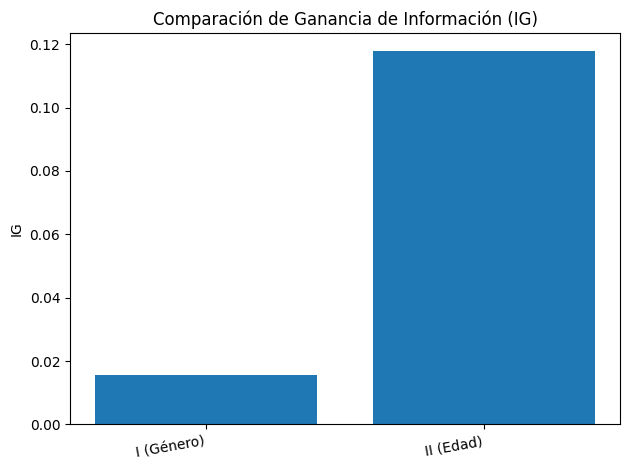

In [ ]:
plt.figure()
plt.bar(tabla4["Clasificador"], tabla4["IG"])
plt.title("Comparación de Ganancia de Información (IG)")
plt.ylabel("IG")
plt.xticks(rotation=10, ha="right")
plt.tight_layout()
plt.show()

## Conclusión única

Se elige como clasificador inicial el atributo que produzca la **mayor Ganancia de Información**,
siguiendo el criterio de la Unidad Didáctica 3. Aprendizaje supervisado de “maximizar la ganancia de información y minimizar la entropía”.

Referencia: (CEUPE, Aprendizaje supervisado, Sección 1.5 Aprendizaje supervisado)


In [ ]:
print(f"IG(I - Género) = {IG_I:.6f}")
print(f"IG(II - Edad)  = {IG_II:.6f}")

if IG_I > IG_II:
    print("Conclusión: el Clasificador I (Género) aporta mayor ganancia de información.")
elif IG_II > IG_I:
    print("Conclusión: el Clasificador II (Edad) aporta mayor ganancia de información.")
else:
    print("Conclusión: ambos clasificadores aportan la misma ganancia de información.")

IG(I - Género) = 0.015712
IG(II - Edad)  = 0.117714
Conclusión: el Clasificador II (Edad) aporta mayor ganancia de información.
